In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup as soup
import json
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
#scrape a single game shots. We will allow users to enter a base url
base_url = 'https://understat.com/player/'
player = str(input('Please enter the player id: '))
playerName=str(input('Please enter the player name: '))
url = base_url+player
# HAALAND'S PLAYER ID IN UNDERSTAT IS 8260

Please enter the player id: 8260
Please enter the player name: Haaland


In [3]:
print(url)
print(playerName)

https://understat.com/player/8260
Haaland


In [4]:
html = requests.get(url)
parse_soup = soup(html.content,'lxml')
scripts = parse_soup.find_all('script')
strings = scripts[3].string
ind_start = strings.index("('")+2
ind_end = strings.index("')")
json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')
data = json.loads(json_data)
x = []
y = []
xg = []
result = []
season = []
situation= []
shotType= []
player_assisted= []
lastAction= []
for i,_ in enumerate(data):
    for key in data[i]:
        if key=='X':
            x.append(data[i][key])
        if key=='Y':
            y.append(data[i][key])
        if key=='xG':
            xg.append(data[i][key])
        if key=='result':
            result.append(data[i][key])
        if key=='season':
            season.append(data[i][key])
        if key=='situation':
            situation.append(data[i][key])
        if key=='shotType':
            shotType.append(data[i][key])
        if key=='player_assisted':
            player_assisted.append(data[i][key])
        if key=='lastAction':
            lastAction.append(data[i][key])
columns = ['X','Y','xG','Result','Season','Situation','Shot Type','Player Assisted','Last Action']
df_understat = pd.DataFrame([x, y, xg, result, season,situation,shotType,player_assisted,lastAction], index=columns)
df_understat = df_understat.T
df_understat = df_understat.apply(pd.to_numeric,errors='ignore')

In [5]:
df_understat['X'] = df_understat['X'].apply(lambda x:x*100)
df_understat['Y'] = df_understat['Y'].apply(lambda x:x*100)
# opta uses 100x100 pitches and our location values between 0-1

In [6]:
df_understat

,X,Y,xG,Result,Season,Situation,Shot Type,Player Assisted,Last Action
0,88.800003,66.599998,0.079333,Goal,2019,OpenPlay,LeftFoot,Jadon Sancho,Throughball
1,98.000000,48.900002,0.920621,Goal,2019,OpenPlay,LeftFoot,Thorgan Hazard,Pass
2,88.300003,34.700001,0.322831,Goal,2019,OpenPlay,LeftFoot,Marco Reus,Throughball
3,88.599998,63.900002,0.119181,BlockedShot,2019,OpenPlay,LeftFoot,Jadon Sancho,Pass
4,95.500000,49.500000,0.746641,Goal,2019,OpenPlay,LeftFoot,None,Rebound
...,...,...,...,...,...,...,...,...,...
120,95.099998,53.000000,0.136556,MissedShots,2020,SetPiece,Head,Marco Reus,Cross
121,91.500000,44.500000,0.125256,BlockedShot,2020,FromCorner,LeftFoot,None,Rebound
122,91.300003,65.800003,0.118228,Goal,2020,OpenPlay,LeftFoot,Reinier,Throughball
123,88.199997,59.099998,0.127112,MissedShots,2020,OpenPlay,LeftFoot,Nico Schulz,Pass


In [7]:
df_understat_2020=df_understat.loc[df_understat['Season']==2020]
df_understat_2020

,X,Y,xG,Result,Season,Situation,Shot Type,Player Assisted,Last Action
33,90.599998,50.599998,0.076097,SavedShot,2020,SetPiece,Head,Jadon Sancho,Chipped
34,88.000000,62.700001,0.066234,BlockedShot,2020,OpenPlay,LeftFoot,Felix Passlack,Chipped
35,94.599998,63.400002,0.044793,MissedShots,2020,FromCorner,LeftFoot,Giovanni Reyna,Cross
36,88.500000,50.000000,0.757777,Goal,2020,Penalty,LeftFoot,None,Standard
37,92.699997,57.500000,0.463049,Goal,2020,OpenPlay,LeftFoot,Jadon Sancho,Pass
...,...,...,...,...,...,...,...,...,...
120,95.099998,53.000000,0.136556,MissedShots,2020,SetPiece,Head,Marco Reus,Cross
121,91.500000,44.500000,0.125256,BlockedShot,2020,FromCorner,LeftFoot,None,Rebound
122,91.300003,65.800003,0.118228,Goal,2020,OpenPlay,LeftFoot,Reinier,Throughball
123,88.199997,59.099998,0.127112,MissedShots,2020,OpenPlay,LeftFoot,Nico Schulz,Pass


In [8]:
totalGoal_2020=len(df_understat_2020[df_understat_2020['Result']=='Goal'])
totalxG_2020=round(sum(df_understat_2020['xG']),2)
totalShots_2020=len(df_understat_2020)
print(totalGoal_2020)
print(totalxG_2020)
print(totalShots_2020)

27
23.6
92


In [31]:
df_understat_2020_xGOT=df_understat_2020.drop(df_understat_2020[ (df_understat_2020['Result']=='BlockedShot') | (df_understat_2020['Result']=='MissedShots')].index)
df_understat_2020_xGOT

,X,Y,xG,Result,Season,Situation,Shot Type,Player Assisted,Last Action
33,90.599998,50.599998,0.076097,SavedShot,2020,SetPiece,Head,Jadon Sancho,Chipped
36,88.500000,50.000000,0.757777,Goal,2020,Penalty,LeftFoot,None,Standard
37,92.699997,57.500000,0.463049,Goal,2020,OpenPlay,LeftFoot,Jadon Sancho,Pass
39,91.900002,38.299999,0.310465,SavedShot,2020,OpenPlay,RightFoot,Jadon Sancho,Throughball
40,90.599998,61.500000,0.100650,Goal,2020,OpenPlay,LeftFoot,Giovanni Reyna,Pass
42,90.400002,67.199997,0.217813,Goal,2020,OpenPlay,LeftFoot,Giovanni Reyna,Pass
45,95.599998,68.400002,0.067367,ShotOnPost,2020,OpenPlay,LeftFoot,Axel Witsel,Pass
46,86.199997,33.000000,0.045975,SavedShot,2020,OpenPlay,LeftFoot,Julian Brandt,BallRecovery
48,94.199997,34.799999,0.358842,Goal,2020,OpenPlay,RightFoot,Jadon Sancho,TakeOn
49,88.199997,60.599998,0.114312,SavedShot,2020,OpenPlay,LeftFoot,Julian Brandt,Pass


In [36]:
totalxGOT_2020=round(sum(df_understat_2020_xGOT['xG']),2)
totalSOT_2020=len(df_understat_2020_xGOT)
SOT_Percent_2020=round(totalSOT_2020/totalShots_2020*100,2)
print(totalxGOT_2020)
print(totalSOT_2020)
print(SOT_Percent_2020)

17.67
52
56.52


In [10]:
df_understat_2020_openPlay=df_understat_2020.loc[df_understat_2020['Situation']=='OpenPlay']
df_understat_2020_penalty=df_understat_2020.loc[df_understat_2020['Situation']=='Penalty']
df_understat_2020_fromCorner=df_understat_2020.loc[df_understat_2020['Situation']=='FromCorner']
df_understat_2020_setPiece=df_understat_2020.loc[df_understat_2020['Situation']=='SetPiece']

openplayxG_2020=round(sum(df_understat_2020_openPlay['xG']),2)
penaltyxG_2020=round(sum(df_understat_2020_penalty['xG']),2)
fromcornerxG_2020=round(sum(df_understat_2020_fromCorner['xG']),2)
setpiecexG_2020=round(sum(df_understat_2020_setPiece['xG']),2)

openplayGoal_2020=len(df_understat_2020_openPlay[df_understat_2020_openPlay['Result']=='Goal'])
penaltyGoal_2020=len(df_understat_2020_penalty[df_understat_2020_penalty['Result']=='Goal'])
fromcornerGoal_2020=len(df_understat_2020_fromCorner[df_understat_2020_fromCorner['Result']=='Goal'])
setpieceGoal_2020=len(df_understat_2020_setPiece[df_understat_2020_setPiece['Result']=='Goal'])

openplayShots_2020=len(df_understat_2020_openPlay)
penaltyShots_2020=len(df_understat_2020_penalty)
fromcornerShots_2020=len(df_understat_2020_fromCorner)
setpieceShots_2020=len(df_understat_2020_setPiece)


print("Open play goal:"+str(openplayGoal_2020)+" and open play xG:"+str(openplayxG_2020)+" and Open play shots:"+str(openplayShots_2020))
print("Penalty goal:"+str(penaltyGoal_2020)+" and penalty xG:"+str(penaltyxG_2020)+" and Penalty Shots:"+str(penaltyShots_2020))
print("From Corner goal:"+str(fromcornerGoal_2020)+" and from corner xG:"+str(fromcornerxG_2020)+" and From Corner Shots:"+str(fromcornerShots_2020))
print("Set Piece goal:"+str(setpieceGoal_2020)+" and set piece xG:"+str(setpiecexG_2020)+" and Set Piece Shots:"+str(setpieceShots_2020))

Open play goal:25 and open play xG:19.43 and Open play shots:80
Penalty goal:2 and penalty xG:3.03 and Penalty Shots:4
From Corner goal:0 and from corner xG:0.17 and From Corner Shots:2
Set Piece goal:0 and set piece xG:0.97 and Set Piece Shots:6


In [11]:
#non-penalty metrics
npxG_2020=totalxG_2020-penaltyxG_2020
npGoals_2020=totalGoal_2020-penaltyGoal_2020
npShots_2020=totalShots_2020-penaltyShots_2020
print(npxG_2020)
print(npGoals_2020)
print(npShots_2020)

20.57
25
88


In [12]:
# what type of goal
df_understat_2020_leftfoot=df_understat_2020.loc[df_understat_2020['Shot Type']=='LeftFoot']
df_understat_2020_rightfoot=df_understat_2020.loc[df_understat_2020['Shot Type']=='RightFoot']
df_understat_2020_head=df_understat_2020.loc[df_understat_2020['Shot Type']=='Head']

leftFootxG_2020=round(sum(df_understat_2020_leftfoot['xG']),2)
rightFootxG_2020=round(sum(df_understat_2020_rightfoot['xG']),2)
headxG_2020=round(sum(df_understat_2020_head['xG']),2)

leftFootGoal_2020=len(df_understat_2020_leftfoot[df_understat_2020_leftfoot['Result']=='Goal'])
rightFootGoal_2020=len(df_understat_2020_rightfoot[df_understat_2020_rightfoot['Result']=='Goal'])
headGoal_2020=len(df_understat_2020_head[df_understat_2020_head['Result']=='Goal'])

leftFootShots_2020=len(df_understat_2020_leftfoot)
rightFootShots_2020=len(df_understat_2020_rightfoot)
headShots_2020=len(df_understat_2020_head)

print("Left Foot Goals:"+str(leftFootGoal_2020)+" and Left Foot xG:"+str(leftFootxG_2020)+" and Left Foot Shots:"+str(leftFootShots_2020))
print("Right Foot Goals:"+str(rightFootGoal_2020)+" and Right Foot xG:"+str(rightFootxG_2020)+" and Right Foot Shots:"+str(rightFootShots_2020))
print("Head Goals:"+str(headGoal_2020)+" and Head xG:"+str(headxG_2020)+" and Head Shots:"+str(headShots_2020))

Left Foot Goals:24 and Left Foot xG:19.7 and Left Foot Shots:73
Right Foot Goals:2 and Right Foot xG:2.76 and Right Foot Shots:9
Head Goals:1 and Head xG:1.13 and Head Shots:10


In [13]:
xG_array=[totalxG_2020,npxG_2020,openplayxG_2020,fromcornerxG_2020,setpiecexG_2020,rightFootxG_2020,leftFootxG_2020,headxG_2020]
goal_array=[totalGoal_2020,npGoals_2020,openplayGoal_2020,fromcornerGoal_2020,setpieceGoal_2020,rightFootGoal_2020,leftFootGoal_2020,headGoal_2020]
shots_array=[totalShots_2020,npShots_2020,openplayShots_2020,fromcornerShots_2020,setpieceShots_2020,rightFootShots_2020,leftFootShots_2020,headShots_2020]

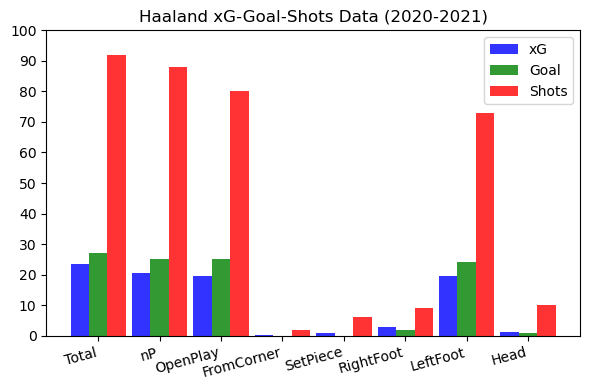

In [15]:
n_groups = 8
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8
#plt.rcParams["figure.figsize"] = (20,3)
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
#plt.rcParams["figure.dpi"] = 200
plt.rcParams["figure.dpi"] = plt.rcParamsDefault["figure.dpi"]

rects1 = plt.bar(index, xG_array, bar_width,
alpha=opacity,
color='b',
label='xG')

rects2 = plt.bar(index + bar_width, goal_array, bar_width,
alpha=opacity,
color='g',
label='Goal')

rects3 = plt.bar(index + bar_width*2, shots_array, bar_width,
alpha=opacity,
color='r',
label='Shots')

#plt.xlabel('X')
#plt.ylabel('Scores')
plt.title(playerName+' xG-Goal-Shots Data (2020-2021)')
plt.xticks(index + bar_width, ('Total', 'nP', 'OpenPlay', 'FromCorner','SetPiece','RightFoot','LeftFoot','Head'))
plt.setp(ax.get_xticklabels(), rotation=15, horizontalalignment='right')
plt.yticks(np.arange(0, 101, 10))
plt.legend()

fig1 = plt.gcf()
plt.tight_layout()
plt.show()
fig1.savefig('haaland-detailed-shots-xg-goals.png', dpi=200)

In [50]:
#scrape fbref data for total minutes information
#ı got this code from https://medium.com/geekculture/an-introduction-to-football-player-dashboards-using-python-and-matplotlib-eb5328dfe85f
def readfromhtml(filepath):
    df = pd.read_html(filepath)[0]
    column_lst = list(df.columns)
    for index in range(len(column_lst)):
        column_lst[index] = column_lst[index][1]
    df.columns = column_lst
    df.drop(df[df['Player'] == 'Player'].index, inplace=True)
    df = df.fillna('0')
    df.set_index('Rk', drop=True, inplace=True)
    try:
        df['Comp'] = df['Comp'].apply(lambda x: ' '.join(x.split()[1:]))
        df['Nation'] = df['Nation'].astype(str)
        df['Nation'] = df['Nation'].apply(lambda x: x.split()[-1])
    except:
        print('Error in uploading file:' + filepath)
    finally:
        df = df.apply(pd.to_numeric, errors='ignore')
        return df
df_fbref = readfromhtml('https://fbref.com/en/comps/Big5/2020-2021/shooting/players/2020-2021-Big-5-European-Leagues-Stats')

In [51]:
df_fbref

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
Rk,,,,,,,,,,,,,,,,,,,,,
1,Ismael Aaneba,FRA,"FW,DF",Strasbourg,Ligue 1,21,1999,0.1,0,0,...,0.0,0,0,0,0.0,0.0,0.00,0.0,0.0,Matches
2,Patrick van Aanholt,NED,DF,Crystal Palace,Premier League,29,1990,19.7,0,18,...,20.3,3,0,0,1.2,1.2,0.07,-1.2,-1.2,Matches
3,Issah Abbas,GHA,"DF,FW",Mainz 05,Bundesliga,21,1998,0.2,0,0,...,0.0,0,0,0,0.0,0.0,0.00,0.0,0.0,Matches
4,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,32,1987,32.1,3,15,...,10.2,0,0,0,1.7,1.7,0.11,1.3,1.3,Matches
5,Sabit Abdulai,GHA,MF,Getafe,La Liga,21,1999,0.7,0,0,...,0.0,0,0,0,0.0,0.0,0.00,0.0,0.0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,Steven Zuber,SUI,"DF,MF",Eint Frankfurt,Bundesliga,28,1991,6.5,0,10,...,18.2,0,0,0,0.8,0.8,0.08,-0.8,-0.8,Matches
2819,Martín Zubimendi,ESP,MF,Real Sociedad,La Liga,21,1999,20.9,0,7,...,12.3,0,0,0,0.6,0.6,0.08,-0.6,-0.6,Matches
2820,Martin Ødegaard,NOR,MF,Arsenal,Premier League,21,1998,9.6,1,15,...,20.5,1,0,0,1.1,1.1,0.07,-0.1,-0.1,Matches


In [52]:
df_player = df_fbref[df_fbref['Player']=='Erling Haaland']
df_player

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
Rk,,,,,,,,,,,,,,,,,,,,,
1087,Erling Haaland,NOR,FW,Dortmund,Bundesliga,20,2000,26.7,27,90,...,12.7,0,2,4,23.7,20.5,0.23,3.3,4.5,Matches


In [53]:
xG_p90_2020=round(sum(totalxG_2020/df_player['90s']),2)
npxG_p90_2020=round(sum(npxG_2020/df_player['90s']),2)
goal_p90_2020=round(sum(totalGoal_2020/df_player['90s']),2)
npGoals_p90_2020=round(sum(npGoals_2020/df_player['90s']),2)
shots_p90_2020=round(sum(totalShots_2020/df_player['90s']),2)
print(xG_p90_2020)
print(npxG_p90_2020)
print(goal_p90_2020)
print(npGoals_p90_2020)
print(shots_p90_2020)

0.88
0.77
1.01
0.94
3.45


In [54]:
total_minutes_2020=int(float(df_player['90s'])*90)
print(total_minutes_2020)

2403


In [57]:
detailed_df= pd.DataFrame({
    'Name': ['Erling Haaland'],
    'Season':['2020-2021'],
    'Minutes': [total_minutes_2020],
    'Goals':[totalGoal_2020],
    'xG':[totalxG_2020],
    'xGOT':[totalxGOT_2020],
    'Shots':[totalShots_2020],
    'SoT':[totalSOT_2020],
    'SoT%':[SOT_Percent_2020],
    'nP Goals':[npGoals_2020],
    'nPxG':[npxG_2020],
    'np Shots':[npShots_2020],
    'Open Play Goals':[openplayGoal_2020],
    'Open Play xG':[openplayxG_2020],
    'Open Play Shots':[openplayShots_2020],
    'From Corner Goals':[fromcornerGoal_2020],
    'From Corner xG':[fromcornerxG_2020],
    'From Corner Shots':[fromcornerShots_2020],
    'Set Piece Goals':[setpieceGoal_2020],
    'Set Piece xG':[setpiecexG_2020],
    'Set Piece Shots':[setpieceShots_2020],
    'Right Foot Goals':[rightFootGoal_2020],
    'Right Foot xG':[rightFootxG_2020],
    'Right Foot Shots':[rightFootShots_2020],
    'Left Foot Goals':[leftFootGoal_2020],
    'Left Foot xG':[leftFootxG_2020],
    'Left Foot Shots':[leftFootShots_2020],
    'Head Goals':[headGoal_2020],
    'Head xG':[headxG_2020],
    'Head Shots':[headShots_2020],
    'Goal_p90':[goal_p90_2020],
    'xG_p90':[xG_p90_2020],
    'Shots_p90':[shots_p90_2020],
    'np Goals_p90':[npGoals_p90_2020],
    'npxG_p90':[npxG_p90_2020]
})
detailed_df.to_csv('haaland-detailed-shots-xg-goals-data.csv',index=False)
detailed_df

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/haaland-detailed-shots-xg-goals-data.csv'